In [2]:
# original: Petr Kajzar
#https://blog.root.cz/ehealth-v-cr/jak-je-to-s-tou-mirkou-spacilovou-a-jejimi-60/

# load packages
library(tidyverse)  # data cleaning
library(rvest)      # web crawler
# set basic variables
max.pages <- 42         # number of pages
filmnames <- NULL       # vector of film names
filmratings <- NULL     # vector of film ratings
filmurl <- NULL         # vector of film reviews urls

# go to web and get all 42 pages with links to reviews
for(i in 1:max.pages) {

  # get every page
  page <- paste("https://kultura.zpravy.idnes.cz/recenze-mirky-spacilove.aspx?strana=", i, sep="")
  page.html <- read_html(page)

  # film names

  # ......... find names of films
  tmp.filmnames <- page.html %>%
    html_nodes(css = ".rec-box") %>%
    html_text(trim = TRUE)

  # ......... delete rating from the film name
  tmp.filmnames <- gsub("[[:digit:]]{1,3}[[:blank:]]%[[:blank:]]", "", tmp.filmnames)

  # film ratings

  # ......... find film ratings
  tmp.filmratings <- page.html %>%
    html_nodes(css = ".rating") %>%
    html_text(trim = TRUE)

  # ......... and make them numeric
  tmp.filmratings <- gsub("[[:blank:]]%", "", tmp.filmratings) %>%
    as.numeric()

  # film reviews url
  tmp.filmurl <- page.html %>%
    html_nodes(css =".art>a") %>%
    html_attr("href")

  # save the results
  filmnames <- c(filmnames, tmp.filmnames)
  filmratings <- c(filmratings, tmp.filmratings)
  filmurl <- c(filmurl, tmp.filmurl)

  # print some info
  print(paste("Page ready:", i))

}

[1] "Page ready: 1"
[1] "Page ready: 2"
[1] "Page ready: 3"
[1] "Page ready: 4"
[1] "Page ready: 5"
[1] "Page ready: 6"
[1] "Page ready: 7"
[1] "Page ready: 8"
[1] "Page ready: 9"
[1] "Page ready: 10"
[1] "Page ready: 11"
[1] "Page ready: 12"
[1] "Page ready: 13"
[1] "Page ready: 14"
[1] "Page ready: 15"
[1] "Page ready: 16"
[1] "Page ready: 17"
[1] "Page ready: 18"
[1] "Page ready: 19"
[1] "Page ready: 20"
[1] "Page ready: 21"
[1] "Page ready: 22"
[1] "Page ready: 23"
[1] "Page ready: 24"
[1] "Page ready: 25"
[1] "Page ready: 26"
[1] "Page ready: 27"
[1] "Page ready: 28"
[1] "Page ready: 29"
[1] "Page ready: 30"
[1] "Page ready: 31"
[1] "Page ready: 32"
[1] "Page ready: 33"
[1] "Page ready: 34"
[1] "Page ready: 35"
[1] "Page ready: 36"
[1] "Page ready: 37"
[1] "Page ready: 38"
[1] "Page ready: 39"
[1] "Page ready: 40"
[1] "Page ready: 41"
[1] "Page ready: 42"


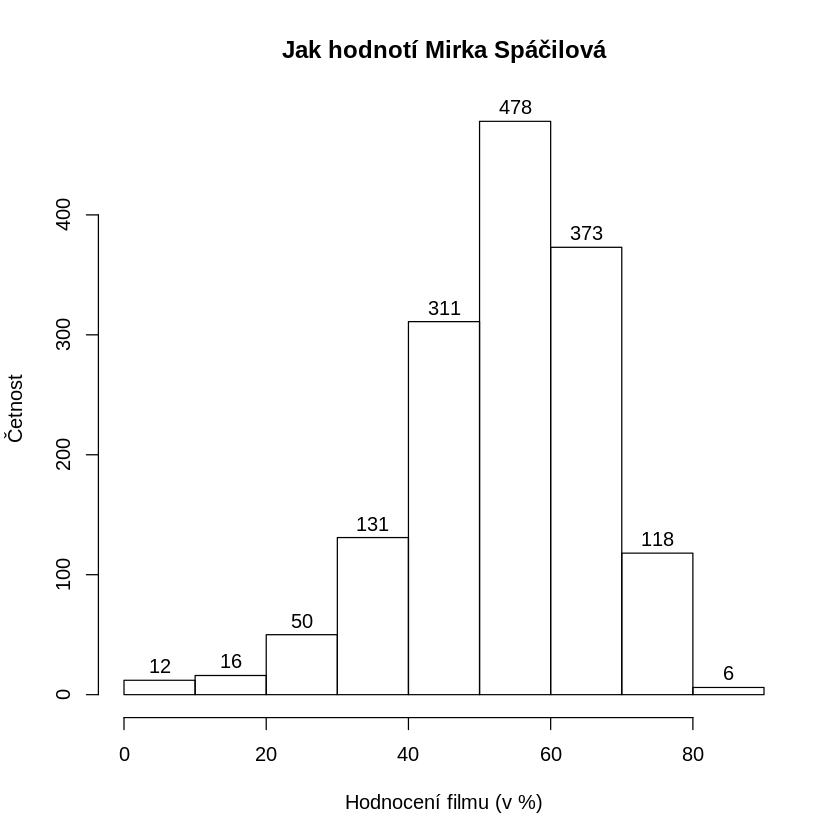

In [3]:
# make data frame
reviews <- data.frame(film   = filmnames,
                      rating = filmratings,
                      url    = filmurl)

# create basic histogram
hist(reviews$rating,
     main   = "Jak hodnotí Mirka Spáčilová",
     xlab   = "Hodnocení filmu (v %)",
     ylab   = "Četnost",
     labels = TRUE)

In [4]:
# write CSV
write.csv(reviews, "reviews.csv",
          row.names    = FALSE,
          fileEncoding = "UTF-8")

In [5]:
table(reviews$rating)


  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90 
  1   2   9   5  11  13  37  26 105  42 269 147 331 163 210  56  62   4   2 

In [6]:
summary(reviews$rating)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   50.00   60.00   56.99   65.00   90.00 